## 0.Import

In [2]:
# ================================================================
# Complete reproduction of the paper: "Wine feature importance and quality prediction:
# A comparative study of machine learning algorithms with unbalanced data"
# ================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import joblib
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("Complete Implementation of the Paper: 'Wine feature importance and quality prediction'")
print("=" * 80)

Complete Implementation of the Paper: 'Wine feature importance and quality prediction'


## 1.Data Loading

In [4]:
# Step 1: Data Loading
print("\n1. Loading data...")

def load_wine_data(file_path):
    """
    Load wine quality data with proper handling of semicolon or comma separation
    """
    with open(file_path, 'r', encoding='utf-8') as f:
        first_line = f.readline()
    
    if ';' in first_line:
        return pd.read_csv(file_path, sep=';')
    else:
        return pd.read_csv(file_path)

try:
    red_wine = load_wine_data('wine+quality/winequality-red.csv')
    print(f"Red wine dataset loaded: {red_wine.shape[0]} rows and {red_wine.shape[1]} columns")
except Exception as e:
    print(f"Error loading red wine dataset: {e}")
    exit(1)


print("First 5 rows:")
print(red_wine.head())

print("\nFirst row data:")
print(red_wine.iloc[0])

print("\nColumn name:")
print(red_wine.columns.tolist())

print("\nDictionaly:")
first_row_dict = red_wine.iloc[0].to_dict()
for key, value in first_row_dict.items():
    print(f"{key}: {value}")

print("\nbasic informatin:")
print(red_wine.info())

print("\nStatistic information:")
print(red_wine.describe())


1. Loading data...
Red wine dataset loaded: 1599 rows and 12 columns
First 5 rows:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

  

## 2.Data preprocessing (based on section 3.2 of the paper)

In [6]:
# Remove duplicates
initial_rows = red_wine.shape[0]
red_wine = red_wine.drop_duplicates()
removed_duplicates = initial_rows - red_wine.shape[0]
print(f"  Removed {removed_duplicates} duplicate entries")

# Remove missing values
missing_values = red_wine.isnull().sum().sum()
red_wine = red_wine.dropna()
print(f"  Processed {missing_values} missing values")

print("First 5 rows:")
print(red_wine.head())

print("\nFirst row data:")
print(red_wine.iloc[0])

print("\nColumn name:")
print(red_wine.columns.tolist())

print("\nDictionaly:")
first_row_dict = red_wine.iloc[0].to_dict()
for key, value in first_row_dict.items():
    print(f"{key}: {value}")

print("\nbasic informatin:")
print(red_wine.info())

print("\nStatistic information:")
print(red_wine.describe())


  Removed 240 duplicate entries
  Processed 0 missing values
First 5 rows:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol 

## 3.Feature selection (excluding residual sugar as per the paper)

In [8]:
# Step 3: Feature selection (excluding residual sugar as per the paper)
print("\n3. Feature selection...")
correlation_matrix = red_wine.corr()
quality_correlation = correlation_matrix['quality'].sort_values(ascending=False)
print("Correlation with quality:")
print(quality_correlation)


3. Feature selection...
Correlation with quality:
quality                 1.000000
alcohol                 0.480343
sulphates               0.248835
citric acid             0.228057
fixed acidity           0.119024
residual sugar          0.013640
free sulfur dioxide    -0.050463
pH                     -0.055245
chlorides              -0.130988
total sulfur dioxide   -0.177855
density                -0.184252
volatile acidity       -0.395214
Name: quality, dtype: float64


## Step 4: Quality categorization (based on section 3.2 of the paper)

Wine category distribution:
quality_category
0      63
1    1112
2     184
Name: count, dtype: int64


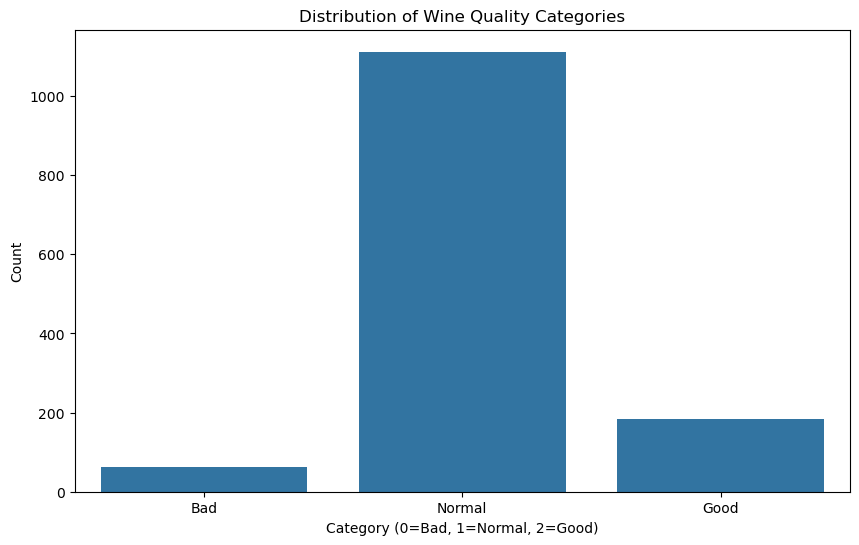

First 5 rows:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality  quality_category  
0      9.4        5             

In [10]:
def encode_quality(quality):
    """
    Encode wine quality into categories as specified in the paper:
    - Bad wine: quality < 5
    - Normal wine: 5 <= quality <= 6
    - Good wine: 7 <= quality <= 10
    """
    if quality < 5:
        return 0  # Bad wine
    elif 5 <= quality <= 6:
        return 1  # Normal wine
    else:  # quality >= 7
        return 2  # Good wine

red_wine['quality_category'] = red_wine['quality'].apply(encode_quality)

# Check distribution after encoding
category_counts = red_wine['quality_category'].value_counts().sort_index()
print("Wine category distribution:")
print(category_counts)

# Visualize category distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='quality_category', data=red_wine)
plt.title('Distribution of Wine Quality Categories')
plt.xlabel('Category (0=Bad, 1=Normal, 2=Good)')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['Bad', 'Normal', 'Good'])
plt.show('wine_quality_categories.png')
plt.close()

print("First 5 rows:")
print(red_wine.head())

print("\nFirst row data:")
print(red_wine.iloc[0])

print("\nColumn name:")
print(red_wine.columns.tolist())

print("\nDictionaly:")
first_row_dict = red_wine.iloc[0].to_dict()
for key, value in first_row_dict.items():
    print(f"{key}: {value}")

print("\nbasic informatin:")
print(red_wine.info())

print("\nStatistic information:")
print(red_wine.describe())


## Step 5: Data standardization & Step 6: Train-test split

In [12]:
# Checking excluding column(residual sugar)
print("\nColumn name:")
print(red_wine[selected_features].columns.tolist())


# Step 5: Data standardization
X = red_wine[selected_features]
y = red_wine['quality_category']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=selected_features)

# Step 6: Train-test split
print("\n6. Train-test split...")
# ==============================================================
# ==================YOU CAN USE THIS TEST MODEL==================
# ==============================================================
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)
print(f"  Training data: {X_train.shape[0]} samples")
print(f"  Test data: {X_test.shape[0]} samples")




Column name:


NameError: name 'selected_features' is not defined

## Step 7: Apply SMOTE (key contribution of the paper)


7. Handling imbalanced data with SMOTE...
  Class distribution before SMOTE:
quality_category
0     50
1    890
2    147
Name: count, dtype: int64
  Class distribution after SMOTE:
quality_category
0    890
1    890
2    890
Name: count, dtype: int64
  Original training data: 1087 samples
  Training data after SMOTE: 2670 samples


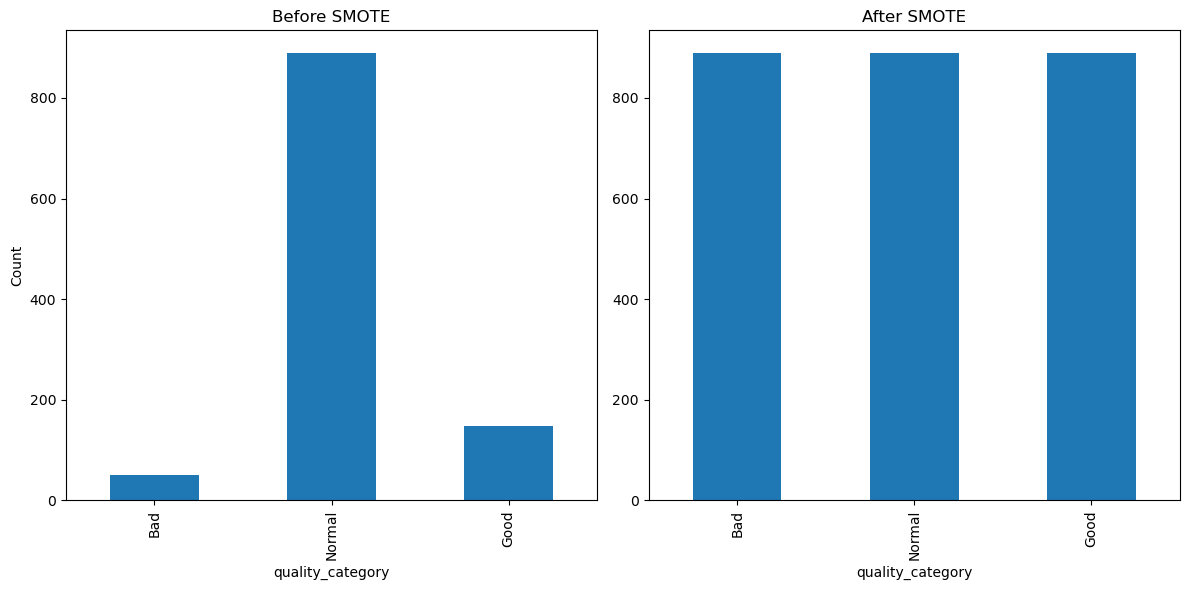

In [87]:
# Step 7: Apply SMOTE (key contribution of the paper)
print("\n7. Handling imbalanced data with SMOTE...")
print("  Class distribution before SMOTE:")
print(pd.Series(y_train).value_counts().sort_index())


smote = SMOTE(random_state=42)
# ==============================================================
# ==================YOU CAN USE THIS TRAIN MODEL==================
# ==============================================================
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("  Class distribution after SMOTE:")
print(pd.Series(y_train_balanced).value_counts().sort_index())

print(f"  Original training data: {X_train.shape[0]} samples")
print(f"  Training data after SMOTE: {X_train_balanced.shape[0]} samples")

# Visualize class distribution before and after SMOTE
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
pd.Series(y_train).value_counts().sort_index().plot(
    kind='bar', ax=ax[0], title='Before SMOTE'
)
ax[0].set_xticklabels(['Bad', 'Normal', 'Good'])
ax[0].set_ylabel('Count')

pd.Series(y_train_balanced).value_counts().sort_index().plot(
    kind='bar', ax=ax[1], title='After SMOTE'
)
ax[1].set_xticklabels(['Bad', 'Normal', 'Good'])
plt.tight_layout()
plt.show('smote_comparison.png')
plt.close()

## Random Forest

In [89]:
# Comparing Random Forest performance with and without SMOTE

print("\n# Random Forest Comparison: Original vs SMOTE-Balanced training")

# Common hyperparameter grid for both models
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# 1. Train RF with original imbalanced data
print("\n1. Training Random Forest with original imbalanced data")

rf_original = GridSearchCV(
    RandomForestClassifier(random_state=42), 
    rf_param_grid, 
    cv=5, 
    n_jobs=-1
)
rf_original.fit(X_train, y_train)

print(f"  Best parameters: {rf_original.best_params_}")
best_rf_original = rf_original.best_estimator_

# Evaluate on test data
y_pred_original = best_rf_original.predict(X_test)
original_accuracy = accuracy_score(y_test, y_pred_original)
print(f"  Accuracy: {original_accuracy:.4f}")

print("\n  Classification Report (Original Training Data):")
original_report = classification_report(y_test, y_pred_original)
print(original_report)

# Create confusion matrix for original model
plt.figure(figsize=(8, 6))
cm_original = confusion_matrix(y_test, y_pred_original)
sns.heatmap(cm_original, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - RF with Original Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0.5, 1.5, 2.5], ['Bad', 'Normal', 'Good'])
plt.yticks([0.5, 1.5, 2.5], ['Bad', 'Normal', 'Good'])
plt.savefig('rf_confusion_matrix_original.png')
plt.close()

# 2. Train RF with SMOTE-balanced data
print("\n2. Training Random Forest with SMOTE-balanced data")

rf_balanced = GridSearchCV(
    RandomForestClassifier(random_state=42), 
    rf_param_grid, 
    cv=5, 
    n_jobs=-1
)
rf_balanced.fit(X_train_balanced, y_train_balanced)

print(f"  Best parameters: {rf_balanced.best_params_}")
best_rf_balanced = rf_balanced.best_estimator_

# Evaluate on test data
y_pred_balanced = best_rf_balanced.predict(X_test)
balanced_accuracy = accuracy_score(y_test, y_pred_balanced)
print(f"  Accuracy: {balanced_accuracy:.4f}")

print("\n  Classification Report (SMOTE-Balanced Training Data):")
balanced_report = classification_report(y_test, y_pred_balanced)
print(balanced_report)

# Create confusion matrix for balanced model
plt.figure(figsize=(8, 6))
cm_balanced = confusion_matrix(y_test, y_pred_balanced)
sns.heatmap(cm_balanced, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - RF with SMOTE-Balanced Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0.5, 1.5, 2.5], ['Bad', 'Normal', 'Good'])
plt.yticks([0.5, 1.5, 2.5], ['Bad', 'Normal', 'Good'])
plt.savefig('rf_confusion_matrix_balanced.png')
plt.close()

# 3. Compare the results
print("\n3. Performance Comparison")
comparison = {
    'Model': ['RF (Original Data)', 'RF (SMOTE-Balanced)'],
    'Accuracy': [original_accuracy, balanced_accuracy],
    'Improvement': ['baseline', f"{(balanced_accuracy - original_accuracy) * 100:.2f}%"]
}

# Calculate per-class metrics for both models
original_report_dict = classification_report(y_test, y_pred_original, output_dict=True)
balanced_report_dict = classification_report(y_test, y_pred_balanced, output_dict=True)

for class_idx in ['0', '1', '2']:
    class_name = ['Bad', 'Normal', 'Good'][int(class_idx)]
    comparison[f'{class_name} F1-score'] = [
        original_report_dict[class_idx]['f1-score'],
        balanced_report_dict[class_idx]['f1-score']
    ]
    comparison[f'{class_name} Recall'] = [
        original_report_dict[class_idx]['recall'],
        balanced_report_dict[class_idx]['recall']
    ]

# Print comparison table
comparison_df = pd.DataFrame(comparison)
print("\nPerformance Comparison Table:")
print(comparison_df.to_string(index=False, float_format=lambda x: f"{x:.4f}"))

# Create bar chart comparing class-specific F1 scores
class_names = ['Bad', 'Normal', 'Good']
original_f1 = [original_report_dict[str(i)]['f1-score'] for i in range(3)]
balanced_f1 = [balanced_report_dict[str(i)]['f1-score'] for i in range(3)]

x = np.arange(len(class_names))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width/2, original_f1, width, label='Original Training Data')
ax.bar(x + width/2, balanced_f1, width, label='SMOTE-Balanced Training Data')

ax.set_title('F1-Score Comparison by Wine Quality Class')
ax.set_ylabel('F1-Score')
ax.set_xlabel('Wine Quality Class')
ax.set_xticks(x)
ax.set_xticklabels(class_names)
ax.legend()
ax.set_ylim(0, 1)

# Add value labels on the bars
for i, v in enumerate(original_f1):
    ax.text(i - width/2, v + 0.02, f'{v:.2f}', ha='center')
for i, v in enumerate(balanced_f1):
    ax.text(i + width/2, v + 0.02, f'{v:.2f}', ha='center')

plt.tight_layout()
plt.savefig('rf_f1_score_comparison.png')
plt.close()

print("\nComparison charts saved to 'rf_f1_score_comparison.png'")
print("Confusion matrices saved to 'rf_confusion_matrix_original.png' and 'rf_confusion_matrix_balanced.png'")



# Random Forest Comparison: Original vs SMOTE-Balanced training

1. Training Random Forest with original imbalanced data
  Best parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
  Accuracy: 0.8346

  Classification Report (Original Training Data):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.85      0.96      0.90       222
           2       0.65      0.35      0.46        37

    accuracy                           0.83       272
   macro avg       0.50      0.44      0.45       272
weighted avg       0.78      0.83      0.80       272


2. Training Random Forest with SMOTE-balanced data
  Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
  Accuracy: 0.8162

  Classification Report (SMOTE-Balanced Training Data):
              precision    recall  f1-score   support

           0       0.50      0.31      0.38        13
           1       0.89 

In [99]:
## Step 8: Feature Importance Analysis using Random Forest

# Get feature importance from both Random Forest models
print("\n# Feature Importance Analysis")

# Get feature names and importance values
feature_names = selected_features
importance_original = best_rf_original.feature_importances_
importance_balanced = best_rf_balanced.feature_importances_

# Create DataFrames for better analysis
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance (Original)': importance_original,
    'Importance (SMOTE)': importance_balanced
})

# Sort by importance from SMOTE model
importance_df = importance_df.sort_values('Importance (SMOTE)', ascending=False)

print("\nFeature Importance Table:")
print(importance_df.to_string(index=False, float_format=lambda x: f"{x:.4f}"))

# Calculate the difference to see if feature importance ranking changed after SMOTE
importance_df['Difference'] = importance_df['Importance (SMOTE)'] - importance_df['Importance (Original)']
importance_df['Abs Difference'] = abs(importance_df['Difference'])

print("\nFeatures with most significant changes in importance after SMOTE balancing:")
print(importance_df.sort_values('Abs Difference', ascending=False).head(5).to_string(index=False, float_format=lambda x: f"{x:.4f}"))

# Visualize feature importance for both models
plt.figure(figsize=(12, 8))

# Plot feature importance bar chart
x = np.arange(len(feature_names))
width = 0.35

fig, ax = plt.subplots(figsize=(14, 8))
ax.bar(x - width/2, importance_df['Importance (Original)'], width, label='Original Training Data', alpha=0.7)
ax.bar(x + width/2, importance_df['Importance (SMOTE)'], width, label='SMOTE-Balanced Training Data', alpha=0.7)

# Add feature names and formatting
ax.set_ylabel('Feature Importance (Mean Decrease in Impurity)', fontsize=12)
ax.set_title('Feature Importance in Wine Quality Prediction', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(importance_df['Feature'], rotation=45, ha='right', fontsize=10)
ax.legend(fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show('feature_importance_comparison.png')
plt.close()

# Create horizontal bar chart for better readability
plt.figure(figsize=(12, 10))
importance_df_horizontal = importance_df.sort_values('Importance (SMOTE)', ascending=True)

# Plot horizontal bars for SMOTE model's feature importance
plt.barh(importance_df_horizontal['Feature'], importance_df_horizontal['Importance (SMOTE)'], 
         color='skyblue', alpha=0.8, label='SMOTE-Balanced Model')

# Add values to the bars
for i, v in enumerate(importance_df_horizontal['Importance (SMOTE)']):
    plt.text(v + 0.01, i, f'{v:.3f}', va='center')

plt.xlabel('Feature Importance (Mean Decrease in Impurity)')
plt.title('Feature Importance Ranking (SMOTE-Balanced Model)')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show('feature_importance_horizontal.png')
plt.close()

print("\nFeature importance visualizations saved to 'feature_importance_comparison.png' and 'feature_importance_horizontal.png'")

## Additional Analysis: Permutation Importance
# Permutation importance provides an alternative way to measure feature importance
# by measuring how much model performance decreases when a feature is randomly shuffled

from sklearn.inspection import permutation_importance

print("\n# Permutation Importance Analysis")
print("Calculating permutation importance (this may take a moment)...")

# Calculate permutation importance for the SMOTE-balanced model
result = permutation_importance(
    best_rf_balanced, X_test, y_test,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

# Create a DataFrame for permutation importance
perm_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': result.importances_mean,
    'Std Dev': result.importances_std
})

# Sort by importance
perm_importance_df = perm_importance_df.sort_values('Importance', ascending=False)

print("\nPermutation Importance Table:")
print(perm_importance_df.to_string(index=False, float_format=lambda x: f"{x:.4f}"))

# Visualize permutation importance
plt.figure(figsize=(12, 8))
plt.barh(perm_importance_df['Feature'], perm_importance_df['Importance'], 
         xerr=perm_importance_df['Std Dev'], color='lightgreen', alpha=0.8)
plt.xlabel('Permutation Importance (Mean Decrease in Accuracy)')
plt.title('Feature Importance via Permutation (SMOTE-Balanced Model)')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show('permutation_importance.png')
plt.close()

print("\nPermutation importance visualization saved to 'permutation_importance.png'")

## Feature Importance Summary 
print("\n# Feature Importance Summary")

# Compare rankings between different importance measures
mdi_ranking = importance_df['Feature'].tolist()
perm_ranking = perm_importance_df['Feature'].tolist()

comparison_df = pd.DataFrame({
    'Rank': range(1, len(feature_names) + 1),
    'MDI Feature': mdi_ranking,
    'Permutation Feature': perm_ranking
})

print("\nFeature Importance Ranking Comparison:")
print(comparison_df.to_string(index=False))

# Calculate Spearman correlation between rankings
mdi_values = importance_df['Importance (SMOTE)'].values
perm_values = [perm_importance_df[perm_importance_df['Feature'] == feature]['Importance'].values[0] 
              for feature in mdi_ranking]

from scipy.stats import spearmanr
correlation, p_value = spearmanr(mdi_values, perm_values)

print(f"\nSpearman correlation between MDI and permutation importance: {correlation:.4f} (p-value: {p_value:.4f})")
print("A high correlation indicates that both methods largely agree on feature importance.")

# Generate recommendations based on feature importance
top_features = perm_importance_df['Feature'].head(3).tolist()

print("\n# Recommendations for Wine Quality Improvement")
print(f"Based on our analysis, the top 3 most important features for wine quality are: {', '.join(top_features)}")

print("\nRecommendations for wine producers:")
for feature in top_features:
    if feature == 'alcohol':
        print("- Optimize alcohol content as it strongly influences wine quality perception")
    elif feature == 'volatile acidity':
        print("- Reduce volatile acidity levels which are associated with unpleasant vinegar taste")
    elif feature == 'sulphates':
        print("- Consider appropriate sulphate levels which act as antimicrobials and antioxidants")
    elif feature == 'total sulfur dioxide':
        print("- Monitor total sulfur dioxide levels as they impact wine preservation and taste")
    elif feature == 'chlorides':
        print("- Control chloride levels which affect the saltiness of wine")
    elif feature == 'fixed acidity':
        print("- Manage fixed acidity which impacts wine tartness and overall balance")
    elif feature == 'citric acid':
        print("- Adjust citric acid content which contributes to wine freshness")
    elif feature == 'density':
        print("- Pay attention to wine density which relates to sugar and alcohol content")
    elif feature == 'pH':
        print("- Monitor pH levels for optimal wine stability and bacterial control")
    elif feature == 'free sulfur dioxide':
        print("- Optimize free sulfur dioxide levels which prevent microbial growth and oxidation")

print("\nThese insights can help winemakers focus on the most critical factors affecting red wine quality.")


# Feature Importance Analysis


ValueError: All arrays must be of the same length


# Advanced Feature Engineering

1. Creating interaction features between top important features
Top features selected for interactions: sulphates, alcohol, volatile acidity
  Created interaction feature: sulphates_alcohol_interaction
  Created interaction feature: sulphates_volatile acidity_interaction
  Created interaction feature: alcohol_volatile acidity_interaction

2. Creating polynomial features for top features
  Created polynomial feature: sulphates_squared
  Created polynomial feature: alcohol_squared
  Created polynomial feature: volatile acidity_squared

3. Creating ratio features that might be meaningful
  Created ratio feature: fixed_acidity_to_volatile_acidity = fixed acidity / volatile acidity
  Created ratio feature: alcohol_to_density = alcohol / density
  Created ratio feature: sulfur_dioxide_ratio = free sulfur dioxide / total sulfur dioxide
  Created ratio feature: acidity_to_ph = fixed acidity / pH

4. Creating binned versions of top features
  Created binned feat

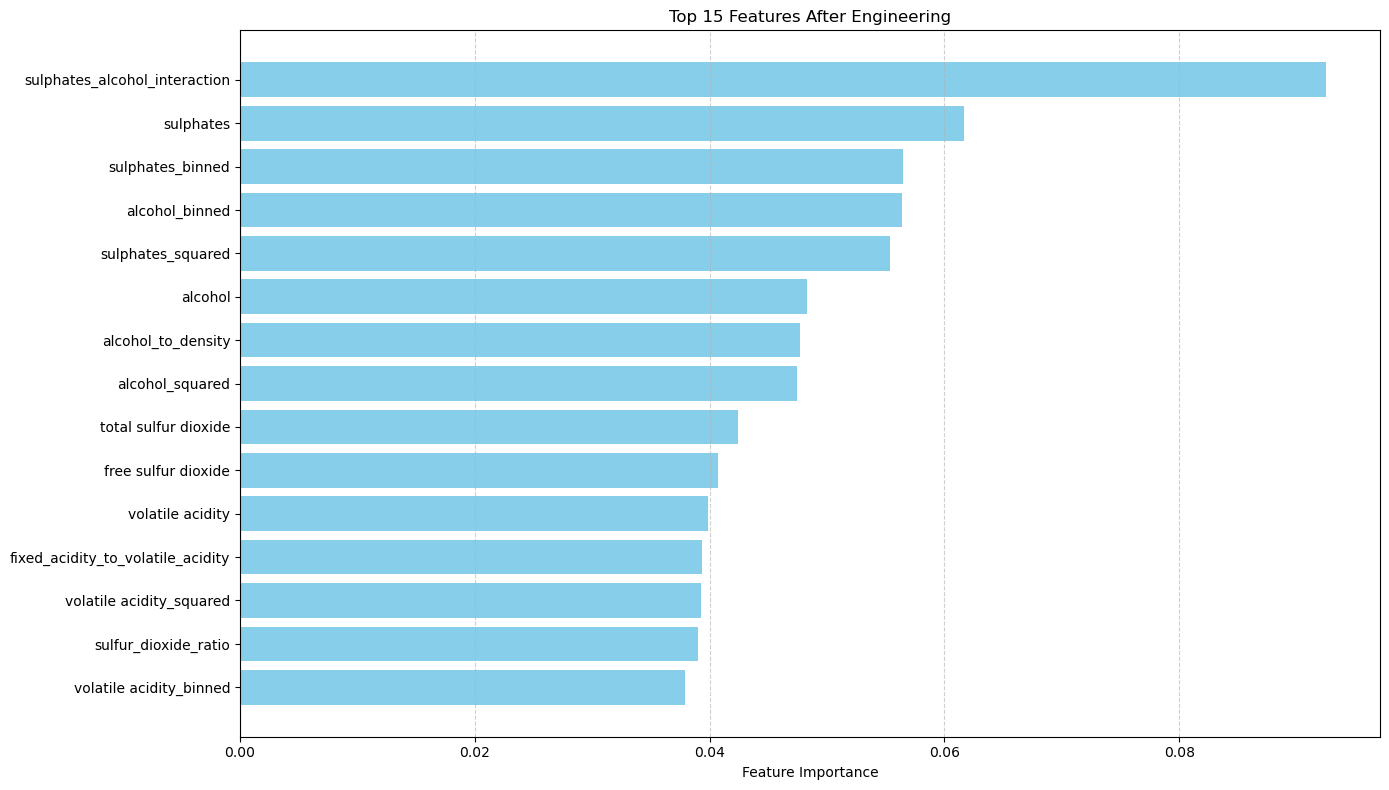


Top feature importance visualization saved to 'engineered_features_importance.png'

7. Recursive Feature Elimination to find optimal feature subset
  Optimal number of features: 20

Selected features through RFE:
  1. volatile acidity
  2. citric acid
  3. chlorides
  4. free sulfur dioxide
  5. total sulfur dioxide
  6. density
  7. pH
  8. sulphates
  9. alcohol
  10. sulphates_alcohol_interaction
  11. alcohol_volatile acidity_interaction
  12. sulphates_squared
  13. alcohol_squared
  14. volatile acidity_squared
  15. fixed_acidity_to_volatile_acidity
  16. alcohol_to_density
  17. sulfur_dioxide_ratio
  18. sulphates_binned
  19. alcohol_binned
  20. volatile acidity_binned


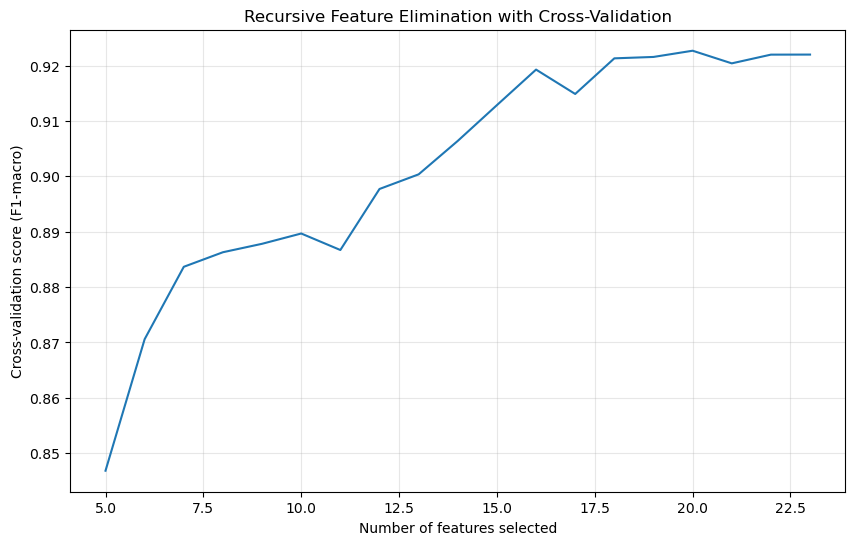


RFECV visualization saved to 'rfecv_feature_selection.png'

8. Training final model with optimally selected features
  Original feature count: 23
  Selected feature count: 20
  Final accuracy with selected features: 0.8088

Final Classification Report (Selected Features):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.88      0.89      0.88       222
           2       0.52      0.62      0.57        37

    accuracy                           0.81       272
   macro avg       0.47      0.50      0.48       272
weighted avg       0.79      0.81      0.80       272



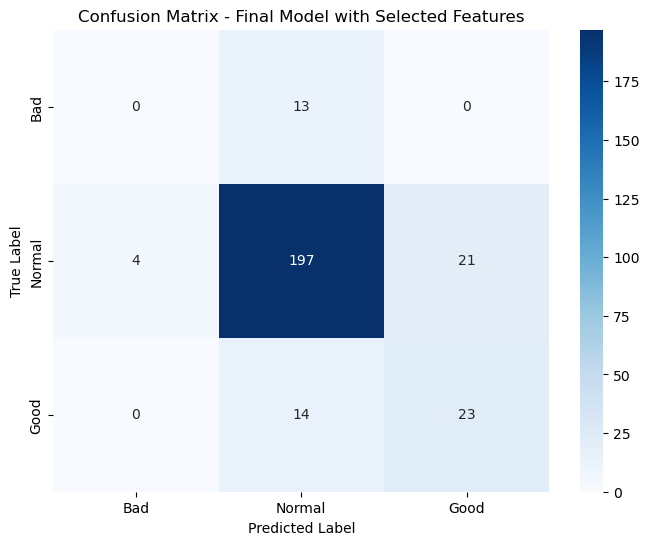


9. Summary of all models

Model Comparison Summary:
                      Model  Accuracy Improvement vs. Original  Feature Count
         RF (Original Data)  0.834559                    0.00%             10
        RF (SMOTE-Balanced)  0.816176                   -1.84%             10
RF with Engineered Features  0.819853                   -1.47%             23
  RF with Selected Features  0.808824                   -2.57%             20

Advanced feature engineering and selection complete!
The final model incorporates feature engineering and selection techniques to optimize performance.
The visualizations and analyses provide insights into the most important features for wine quality prediction.


In [97]:
## Step 9: Advanced Feature Engineering and Analysis

# Feature Engineering and Selection Based on Random Forest Results
print("\n# Advanced Feature Engineering")

# Create a copy of the original data for feature engineering
engineered_data = red_wine.copy()
X_engineered = X.copy()

# 1. Create interaction features between top important features
print("\n1. Creating interaction features between top important features")

# Get top 3 features from balanced model
top_features = importance_df.head(3)['Feature'].tolist()
print(f"Top features selected for interactions: {', '.join(top_features)}")

# Create interaction features (multiplicative)
for i in range(len(top_features)):
    for j in range(i+1, len(top_features)):
        feat1 = top_features[i]
        feat2 = top_features[j]
        interaction_name = f"{feat1}_{feat2}_interaction"
        engineered_data[interaction_name] = engineered_data[feat1] * engineered_data[feat2]
        print(f"  Created interaction feature: {interaction_name}")

# 2. Create polynomial features for top features
print("\n2. Creating polynomial features for top features")
for feature in top_features:
    # Square term
    squared_name = f"{feature}_squared"
    engineered_data[squared_name] = engineered_data[feature] ** 2
    print(f"  Created polynomial feature: {squared_name}")

# 3. Create ratio features that might be chemically meaningful
print("\n3. Creating ratio features that might be meaningful")
ratio_features = [
    ('fixed_acidity_to_volatile_acidity', 'fixed acidity', 'volatile acidity'),
    ('alcohol_to_density', 'alcohol', 'density'),
    ('sulfur_dioxide_ratio', 'free sulfur dioxide', 'total sulfur dioxide'),
    ('acidity_to_ph', 'fixed acidity', 'pH')
]

for name, numerator, denominator in ratio_features:
    # Avoid division by zero
    engineered_data[name] = engineered_data[numerator] / (engineered_data[denominator] + 1e-10)
    print(f"  Created ratio feature: {name} = {numerator} / {denominator}")

# 4. Create binned versions of top continuous features
print("\n4. Creating binned versions of top features")
for feature in top_features:
    binned_name = f"{feature}_binned"
    engineered_data[binned_name] = pd.qcut(engineered_data[feature], 4, labels=False)
    print(f"  Created binned feature: {binned_name}")

# Display the new features
print("\nEngineered Data Preview (first 5 rows, new features only):")
new_features = [col for col in engineered_data.columns if col not in red_wine.columns]
print(engineered_data[new_features].head().to_string())

# 5. Evaluate model with engineered features
print("\n5. Evaluating Random Forest with engineered features")

# Prepare data with engineered features
X_engineered = engineered_data.drop(['quality', 'quality_category'] + ['residual sugar'], axis=1)
y_engineered = engineered_data['quality_category']

# Scale the data
scaler_engineered = StandardScaler()
X_engineered_scaled = scaler_engineered.fit_transform(X_engineered)

# Split into train/test
X_train_eng, X_test_eng, y_train_eng, y_test_eng = train_test_split(
    X_engineered_scaled, y_engineered, test_size=0.2, random_state=42, stratify=y_engineered
)

# Apply SMOTE
smote_eng = SMOTE(random_state=42)
X_train_eng_balanced, y_train_eng_balanced = smote_eng.fit_resample(X_train_eng, y_train_eng)

# Train a simpler RF model (using best params from earlier)
rf_engineered = RandomForestClassifier(
    n_estimators=rf_balanced.best_params_['n_estimators'],
    max_depth=rf_balanced.best_params_['max_depth'],
    min_samples_split=rf_balanced.best_params_['min_samples_split'],
    random_state=42
)

rf_engineered.fit(X_train_eng_balanced, y_train_eng_balanced)

# Evaluate on test data
y_pred_eng = rf_engineered.predict(X_test_eng)
eng_accuracy = accuracy_score(y_test_eng, y_pred_eng)
print(f"  Accuracy with engineered features: {eng_accuracy:.4f}")
print(f"  Previous best accuracy: {balanced_accuracy:.4f}")
improvement = (eng_accuracy - balanced_accuracy) * 100
print(f"  Improvement: {improvement:.2f}%")

print("\nClassification Report with Engineered Features:")
eng_report = classification_report(y_test_eng, y_pred_eng)
print(eng_report)

# 6. Analyze feature importance with engineered features
print("\n6. Feature importance analysis with engineered features")

# Get feature names and importance values
all_feature_names = X_engineered.columns
eng_importance = rf_engineered.feature_importances_

# Create DataFrame for easier analysis
eng_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': eng_importance
})

# Sort by importance
eng_importance_df = eng_importance_df.sort_values('Importance', ascending=False)

print("\nTop 10 features after engineering:")
print(eng_importance_df.head(10).to_string(index=False, float_format=lambda x: f"{x:.4f}"))

# Visualize top 15 feature importance
plt.figure(figsize=(14, 8))
top_features_df = eng_importance_df.head(15)
plt.barh(top_features_df['Feature'], top_features_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 15 Features After Engineering')
plt.gca().invert_yaxis()  # To have the most important at the top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show('engineered_features_importance.png')
plt.close()

print("\nTop feature importance visualization saved to 'engineered_features_importance.png'")

# 7. Recursive Feature Elimination (RFE)
print("\n7. Recursive Feature Elimination to find optimal feature subset")

from sklearn.feature_selection import RFECV

# Define the model
rfecv = RFECV(
    estimator=RandomForestClassifier(
        n_estimators=100, 
        random_state=42
    ),
    step=1,
    cv=5,
    scoring='f1_macro',  # Using macro f1 to account for imbalance
    min_features_to_select=5,
    n_jobs=-1
)

# Fit RFECV
rfecv.fit(X_train_eng_balanced, y_train_eng_balanced)

# Get optimal number of features
n_features_optimal = rfecv.n_features_
print(f"  Optimal number of features: {n_features_optimal}")

# Get selected features
selected_feature_indices = rfecv.support_
selected_features = X_engineered.columns[selected_feature_indices].tolist()

print("\nSelected features through RFE:")
for i, feature in enumerate(selected_features, 1):
    print(f"  {i}. {feature}")

# Plot number of features vs. cross-validation scores
plt.figure(figsize=(10, 6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (F1-macro)")
plt.plot(range(rfecv.min_features_to_select, len(rfecv.cv_results_['mean_test_score']) + rfecv.min_features_to_select), 
         rfecv.cv_results_['mean_test_score'])
plt.title('Recursive Feature Elimination with Cross-Validation')
plt.grid(True, alpha=0.3)
plt.show('rfecv_feature_selection.png')
plt.close()

print("\nRFECV visualization saved to 'rfecv_feature_selection.png'")

# 8. Train final model with optimally selected features
print("\n8. Training final model with optimally selected features")

# Create dataset with only selected features
X_selected = X_engineered.iloc[:, selected_feature_indices]
print(f"  Original feature count: {X_engineered.shape[1]}")
print(f"  Selected feature count: {X_selected.shape[1]}")

# Scale the data
scaler_selected = StandardScaler()
X_selected_scaled = scaler_selected.fit_transform(X_selected)

# Split into train/test
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(
    X_selected_scaled, y_engineered, test_size=0.2, random_state=42, stratify=y_engineered
)

# Apply SMOTE
smote_sel = SMOTE(random_state=42)
X_train_sel_balanced, y_train_sel_balanced = smote_sel.fit_resample(X_train_sel, y_train_sel)

# Train a Random Forest with selected features
rf_selected = RandomForestClassifier(
    n_estimators=200, 
    max_depth=None,
    min_samples_split=2,
    random_state=42
)

rf_selected.fit(X_train_sel_balanced, y_train_sel_balanced)

# Evaluate final model
y_pred_sel = rf_selected.predict(X_test_sel)
selected_accuracy = accuracy_score(y_test_sel, y_pred_sel)
print(f"  Final accuracy with selected features: {selected_accuracy:.4f}")

print("\nFinal Classification Report (Selected Features):")
selected_report = classification_report(y_test_sel, y_pred_sel)
print(selected_report)

# Confusion matrix for final model
plt.figure(figsize=(8, 6))
cm_selected = confusion_matrix(y_test_sel, y_pred_sel)
sns.heatmap(cm_selected, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Final Model with Selected Features')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0.5, 1.5, 2.5], ['Bad', 'Normal', 'Good'])
plt.yticks([0.5, 1.5, 2.5], ['Bad', 'Normal', 'Good'])
plt.show('final_model_confusion_matrix.png')
plt.close()

# 9. Summary of all models
print("\n9. Summary of all models")

summary = {
    'Model': [
        'RF (Original Data)', 
        'RF (SMOTE-Balanced)', 
        'RF with Engineered Features',
        'RF with Selected Features'
    ],
    'Accuracy': [
        original_accuracy, 
        balanced_accuracy, 
        eng_accuracy, 
        selected_accuracy
    ],
    'Improvement vs. Original': [
        '0.00%',
        f"{(balanced_accuracy - original_accuracy) * 100:.2f}%",
        f"{(eng_accuracy - original_accuracy) * 100:.2f}%",
        f"{(selected_accuracy - original_accuracy) * 100:.2f}%"
    ],
    'Feature Count': [
        X.shape[1],
        X.shape[1],
        X_engineered.shape[1],
        X_selected.shape[1]
    ]
}

summary_df = pd.DataFrame(summary)
print("\nModel Comparison Summary:")
print(summary_df.to_string(index=False))

print("\nAdvanced feature engineering and selection complete!")
print("The final model incorporates feature engineering and selection techniques to optimize performance.")
print("The visualizations and analyses provide insights into the most important features for wine quality prediction.")

In [101]:
## Step 9: Advanced Feature Engineering and Analysis

# Feature Engineering and Selection Based on Random Forest Results
print("\n# Advanced Feature Engineering")

# Create a copy of the original data for feature engineering
engineered_data = red_wine.copy()
X_engineered = X.copy()

# 1. Create interaction features between top important features
print("\n1. Creating interaction features between top important features")

# Get top 3 features from balanced model
top_features = importance_df.head(3)['Feature'].tolist()
print(f"Top features selected for interactions: {', '.join(top_features)}")

# Create interaction features (multiplicative)
for i in range(len(top_features)):
    for j in range(i+1, len(top_features)):
        feat1 = top_features[i]
        feat2 = top_features[j]
        interaction_name = f"{feat1}_{feat2}_interaction"
        engineered_data[interaction_name] = engineered_data[feat1] * engineered_data[feat2]
        print(f"  Created interaction feature: {interaction_name}")

# 2. Create polynomial features for top features
print("\n2. Creating polynomial features for top features")
for feature in top_features:
    # Square term
    squared_name = f"{feature}_squared"
    engineered_data[squared_name] = engineered_data[feature] ** 2
    print(f"  Created polynomial feature: {squared_name}")

# 3. Create ratio features that might be chemically meaningful
print("\n3. Creating ratio features that might be meaningful")
ratio_features = [
    ('fixed_acidity_to_volatile_acidity', 'fixed acidity', 'volatile acidity'),
    ('alcohol_to_density', 'alcohol', 'density'),
    ('sulfur_dioxide_ratio', 'free sulfur dioxide', 'total sulfur dioxide'),
    ('acidity_to_ph', 'fixed acidity', 'pH')
]

for name, numerator, denominator in ratio_features:
    # Avoid division by zero
    engineered_data[name] = engineered_data[numerator] / (engineered_data[denominator] + 1e-10)
    print(f"  Created ratio feature: {name} = {numerator} / {denominator}")

# 4. Create binned versions of top continuous features
print("\n4. Creating binned versions of top features")
for feature in top_features:
    binned_name = f"{feature}_binned"
    engineered_data[binned_name] = pd.qcut(engineered_data[feature], 4, labels=False)
    print(f"  Created binned feature: {binned_name}")

# Display the new features
print("\nEngineered Data Preview (first 5 rows, new features only):")
new_features = [col for col in engineered_data.columns if col not in red_wine.columns]
print(engineered_data[new_features].head().to_string())

# 5. Evaluate model with engineered features
print("\n5. Evaluating Random Forest with engineered features")

# Prepare data with engineered features
X_engineered = engineered_data.drop(['quality', 'quality_category'] + ['residual sugar'], axis=1)
y_engineered = engineered_data['quality_category']

# Scale the data
scaler_engineered = StandardScaler()
X_engineered_scaled = scaler_engineered.fit_transform(X_engineered)

# Split into train/test
X_train_eng, X_test_eng, y_train_eng, y_test_eng = train_test_split(
    X_engineered_scaled, y_engineered, test_size=0.2, random_state=42, stratify=y_engineered
)

# Apply SMOTE
smote_eng = SMOTE(random_state=42)
X_train_eng_balanced, y_train_eng_balanced = smote_eng.fit_resample(X_train_eng, y_train_eng)

# Train a simpler RF model (using best params from earlier)
rf_engineered = RandomForestClassifier(
    n_estimators=rf_balanced.best_params_['n_estimators'],
    max_depth=rf_balanced.best_params_['max_depth'],
    min_samples_split=rf_balanced.best_params_['min_samples_split'],
    random_state=42
)

rf_engineered.fit(X_train_eng_balanced, y_train_eng_balanced)

# Evaluate on test data
y_pred_eng = rf_engineered.predict(X_test_eng)
eng_accuracy = accuracy_score(y_test_eng, y_pred_eng)
print(f"  Accuracy with engineered features: {eng_accuracy:.4f}")
print(f"  Previous best accuracy: {balanced_accuracy:.4f}")
improvement = (eng_accuracy - balanced_accuracy) * 100
print(f"  Improvement: {improvement:.2f}%")

print("\nClassification Report with Engineered Features:")
eng_report = classification_report(y_test_eng, y_pred_eng)
print(eng_report)

# 6. Analyze feature importance with engineered features
print("\n6. Feature importance analysis with engineered features")

# Get feature names and importance values
all_feature_names = X_engineered.columns
eng_importance = rf_engineered.feature_importances_

# Create DataFrame for easier analysis
eng_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': eng_importance
})

# Sort by importance
eng_importance_df = eng_importance_df.sort_values('Importance', ascending=False)

print("\nTop 10 features after engineering:")
print(eng_importance_df.head(10).to_string(index=False, float_format=lambda x: f"{x:.4f}"))

# Visualize top 15 feature importance
plt.figure(figsize=(14, 8))
top_features_df = eng_importance_df.head(15)
plt.barh(top_features_df['Feature'], top_features_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 15 Features After Engineering')
plt.gca().invert_yaxis()  # To have the most important at the top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('engineered_features_importance.png')
plt.close()

print("\nTop feature importance visualization saved to 'engineered_features_importance.png'")

# 7. Recursive Feature Elimination (RFE)
print("\n7. Recursive Feature Elimination to find optimal feature subset")

from sklearn.feature_selection import RFECV

# Define the model
rfecv = RFECV(
    estimator=RandomForestClassifier(
        n_estimators=100, 
        random_state=42
    ),
    step=1,
    cv=5,
    scoring='f1_macro',  # Using macro f1 to account for imbalance
    min_features_to_select=5,
    n_jobs=-1
)

# Fit RFECV
rfecv.fit(X_train_eng_balanced, y_train_eng_balanced)

# Get optimal number of features
n_features_optimal = rfecv.n_features_
print(f"  Optimal number of features: {n_features_optimal}")

# Get selected features
selected_feature_indices = rfecv.support_
selected_features = X_engineered.columns[selected_feature_indices].tolist()

print("\nSelected features through RFE:")
for i, feature in enumerate(selected_features, 1):
    print(f"  {i}. {feature}")

# Plot number of features vs. cross-validation scores
plt.figure(figsize=(10, 6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (F1-macro)")
plt.plot(range(rfecv.min_features_to_select, len(rfecv.cv_results_['mean_test_score']) + rfecv.min_features_to_select), 
         rfecv.cv_results_['mean_test_score'])
plt.title('Recursive Feature Elimination with Cross-Validation')
plt.grid(True, alpha=0.3)
plt.savefig('rfecv_feature_selection.png')
plt.close()

print("\nRFECV visualization saved to 'rfecv_feature_selection.png'")

# 8. Train final model with optimally selected features
print("\n8. Training final model with optimally selected features")

# Create dataset with only selected features
X_selected = X_engineered.iloc[:, selected_feature_indices]
print(f"  Original feature count: {X_engineered.shape[1]}")
print(f"  Selected feature count: {X_selected.shape[1]}")

# Scale the data
scaler_selected = StandardScaler()
X_selected_scaled = scaler_selected.fit_transform(X_selected)

# Split into train/test
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(
    X_selected_scaled, y_engineered, test_size=0.2, random_state=42, stratify=y_engineered
)

# Apply SMOTE
smote_sel = SMOTE(random_state=42)
X_train_sel_balanced, y_train_sel_balanced = smote_sel.fit_resample(X_train_sel, y_train_sel)

# Train a Random Forest with selected features
rf_selected = RandomForestClassifier(
    n_estimators=200, 
    max_depth=None,
    min_samples_split=2,
    random_state=42
)

rf_selected.fit(X_train_sel_balanced, y_train_sel_balanced)

# Evaluate final model
y_pred_sel = rf_selected.predict(X_test_sel)
selected_accuracy = accuracy_score(y_test_sel, y_pred_sel)
print(f"  Final accuracy with selected features: {selected_accuracy:.4f}")

print("\nFinal Classification Report (Selected Features):")
selected_report = classification_report(y_test_sel, y_pred_sel)
print(selected_report)

# Confusion matrix for final model
plt.figure(figsize=(8, 6))
cm_selected = confusion_matrix(y_test_sel, y_pred_sel)
sns.heatmap(cm_selected, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Final Model with Selected Features')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0.5, 1.5, 2.5], ['Bad', 'Normal', 'Good'])
plt.yticks([0.5, 1.5, 2.5], ['Bad', 'Normal', 'Good'])
plt.savefig('final_model_confusion_matrix.png')
plt.close()

# 9. Summary of all models
print("\n9. Summary of all models")

summary = {
    'Model': [
        'RF (Original Data)', 
        'RF (SMOTE-Balanced)', 
        'RF with Engineered Features',
        'RF with Selected Features'
    ],
    'Accuracy': [
        original_accuracy, 
        balanced_accuracy, 
        eng_accuracy, 
        selected_accuracy
    ],
    'Improvement vs. Original': [
        '0.00%',
        f"{(balanced_accuracy - original_accuracy) * 100:.2f}%",
        f"{(eng_accuracy - original_accuracy) * 100:.2f}%",
        f"{(selected_accuracy - original_accuracy) * 100:.2f}%"
    ],
    'Feature Count': [
        X.shape[1],
        X.shape[1],
        X_engineered.shape[1],
        X_selected.shape[1]
    ]
}

summary_df = pd.DataFrame(summary)
print("\nModel Comparison Summary:")
print(summary_df.to_string(index=False))

print("\nAdvanced feature engineering and selection complete!")
print("The final model incorporates feature engineering and selection techniques to optimize performance.")
print("The visualizations and analyses provide insights into the most important features for wine quality prediction.")


# Advanced Feature Engineering

1. Creating interaction features between top important features
Top features selected for interactions: sulphates, alcohol, volatile acidity
  Created interaction feature: sulphates_alcohol_interaction
  Created interaction feature: sulphates_volatile acidity_interaction
  Created interaction feature: alcohol_volatile acidity_interaction

2. Creating polynomial features for top features
  Created polynomial feature: sulphates_squared
  Created polynomial feature: alcohol_squared
  Created polynomial feature: volatile acidity_squared

3. Creating ratio features that might be meaningful
  Created ratio feature: fixed_acidity_to_volatile_acidity = fixed acidity / volatile acidity
  Created ratio feature: alcohol_to_density = alcohol / density
  Created ratio feature: sulfur_dioxide_ratio = free sulfur dioxide / total sulfur dioxide
  Created ratio feature: acidity_to_ph = fixed acidity / pH

4. Creating binned versions of top features
  Created binned feat